In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

In [2]:
folders = [f for f in os.listdir() if "vs" in f]
folders

['X_vs_None_Flare',
 'M_vs_None_Flare',
 'M_vs_None_Flare_chronogical',
 'X_vs_None_Flare_chronological',
 'M_vs_X',
 'M_vs_X_chronological']

In [3]:
import glob

files_by_folders_dict = {}
for f in folders:
    files_by_folders_dict[f] = glob.glob(os.path.join(f,'*.csv'))
# files_by_folders_dict

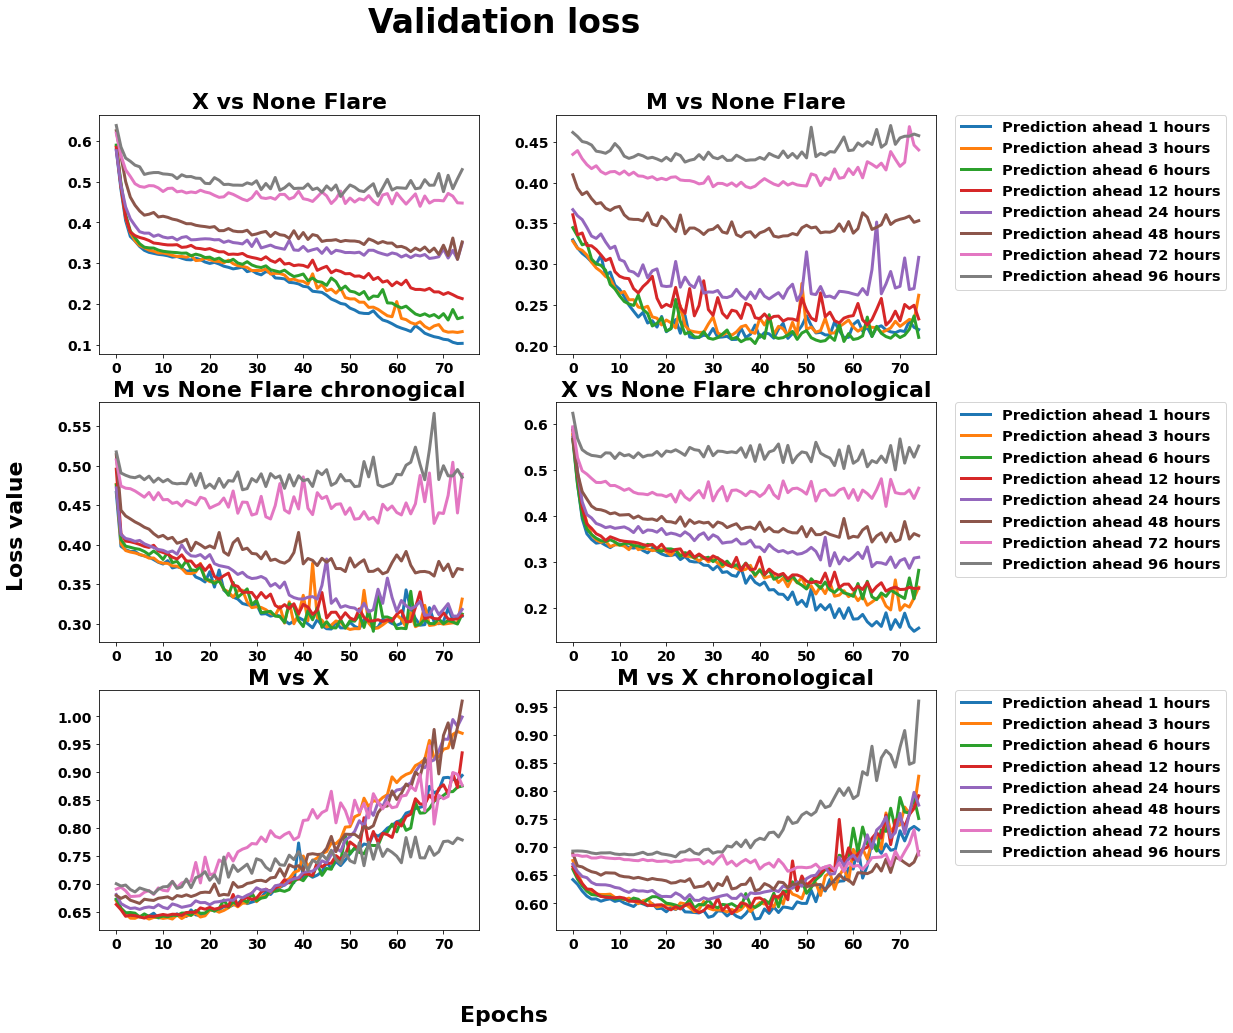

In [82]:
plot_rows = 3
plot_cols = len(folders)//plot_rows

log_csv_col_names = ['val_loss']

fw = 'bold'
fs = 22

fig, axes = plt.subplots(plot_rows, plot_cols)#sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(15)

fig.suptitle("Validation loss",fontweight=fw,fontsize = fs*1.5)
fig.text(0.5, 0.04, 'Epochs', ha='center',fontweight=fw,fontsize = fs)
fig.text(0.04, 0.5, 'Loss value', va='center', rotation='vertical',fontweight=fw,fontsize = fs)


for idx,(key,vals) in enumerate(files_by_folders_dict.items()):
    row_idx = idx // plot_cols
    col_idx = idx % plot_cols
#     print(idx,row_idx,col_idx)
    
    ax = axes[row_idx,col_idx]
#     ax.set_ylim(0.2,1)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fs//1.5)
        item.set_fontweight(fw)
        
    title = key.replace('_',' ')
    ax.set_title(title,fontweight=fw,fontsize = fs)
    vals = sorted(vals,key=lambda x: float(x.split('P')[1].split('_')[0]))
    for logfile in vals:
        prediction_frame = int(logfile.split('P')[1].split('_')[0])
        df = pd.read_csv(logfile)
        p = ax.plot(df[log_csv_col_names],linewidth=3,label = 'Prediction ahead {} hours'.format(prediction_frame))
#         print(p[0].get_color(),p[0])
        
        
    #ax.legend(prop={'weight':fw,'size':fs/1.5})
    if(col_idx==1):
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'weight':fw,'size':fs/1.5})
    
